In [1]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt



In [2]:
MetricNames = ('Slope', 'Interc', 'R', 'R^2', 'RMSE', 'MSE', 'MUE', 'TAU')
SampleTypes = ('NoUnc.WoutRep', 'LgUnc.WoutRep', 'NoUnc.WRep', 'LgUnc.WRep')
MetricVals = np.zeros([len(SampleTypes),len(MetricNames)], np.float64)
MetricErrs = np.zeros([len(SampleTypes),len(MetricNames)], np.float64)

def bootstrap(x, y, xsem, ysem, WithRep):
    BootCyc=1000
    MNames = MetricNames
    MTmp = np.zeros([len(MNames),BootCyc], np.float64)
    MVals = np.zeros([len(MNames)], np.float64)
    MErrs = np.zeros([len(MNames)], np.float64)
    xtmp = np.zeros([len(x)], np.float64)
    ytmp = np.zeros([len(x)], np.float64)
    yfit = np.zeros([len(x)], np.float64)
    plt.figure(figsize=(7, 36))
    plt.subplot(len(MNames)+1,1,1)
    plt.plot([dmin, dmax], [dmin, dmax], 'k-', zorder=2);
    plt.plot(x, y, 'b.', zorder=3);
    plt.xlabel('Experiment')
    plt.ylabel('Calcalted')
    plt.hold(True);

    for b in range(BootCyc):
        for i in range(len(x)):
            # Sample without replacment
            if not WithRep:
                j = i 
            # Sample with replacement
            else:
                j = np.random.randint(len(x))
            xtmp[i] = np.random.normal(x[j], xsem[j]+0.0000001)  # Prevent failure if 0.0
            ytmp[i] = np.random.normal(y[j], ysem[j]+0.0000001)  # Prevent failure if 0.0
        # Slope, Intercept, R
        MTmp[0,b], MTmp[1,b], MTmp[2,b], pval, stderr = stats.linregress(xtmp,ytmp)
        # R^2
        MTmp[3,b] = MTmp[2,b]**2
        # RMSE
        MTmp[4,b] = np.sqrt(np.mean(((ytmp - xtmp) ** 2)))
        # MSE
        MTmp[5,b] = np.mean((ytmp - xtmp))
        # MUE
        MTmp[6,b] = np.mean(np.absolute(ytmp - xtmp))
        # Tau
        MTmp[7,b], prob = stats.kendalltau(xtmp,ytmp)
        # Plot bootstraps
        yfit = MTmp[1,b] + MTmp[0,b]*xtmp
        plt.plot(xtmp, yfit, 'r-', alpha=0.05, zorder=1);
    
    for M in range(len(MNames)):
        MVals[M]=np.mean(MTmp[M])
        MErrs[M]=np.std(MTmp[M])
        #print "%12s  %6.2f  (%6.2f)" % (MNames[i],MVals[i],MErrs[i])
        plt.subplot(len(MNames)+1,1,M+2);
        if M == 0 or M == 1 or M == 5:
            
            plt.hist(MTmp[M], 50);
        if M == 2 or M == 7:
            plt.hist(MTmp[M], 50, range=[-1,1]);
        if M == 3:
            plt.hist(MTmp[M], 50, range=[0,1]);
        if M == 4 or M == 6:
            plt.hist(MTmp[M], 50, range=[0,5]);
        plt.hold(True);
        oldaxis = plt.axis();
        plt.plot([MVals[M],MVals[M]], [0, oldaxis[3]], 'r-');
        plt.xlabel(MNames[M])
        plt.ylabel('Count')
    return (MVals,MErrs)


These are the error metric distributions for: MovTyp-1




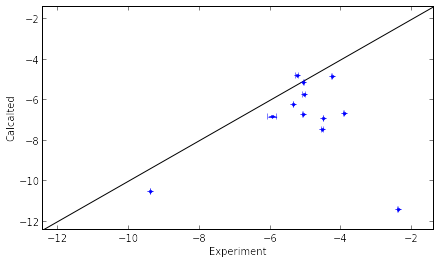

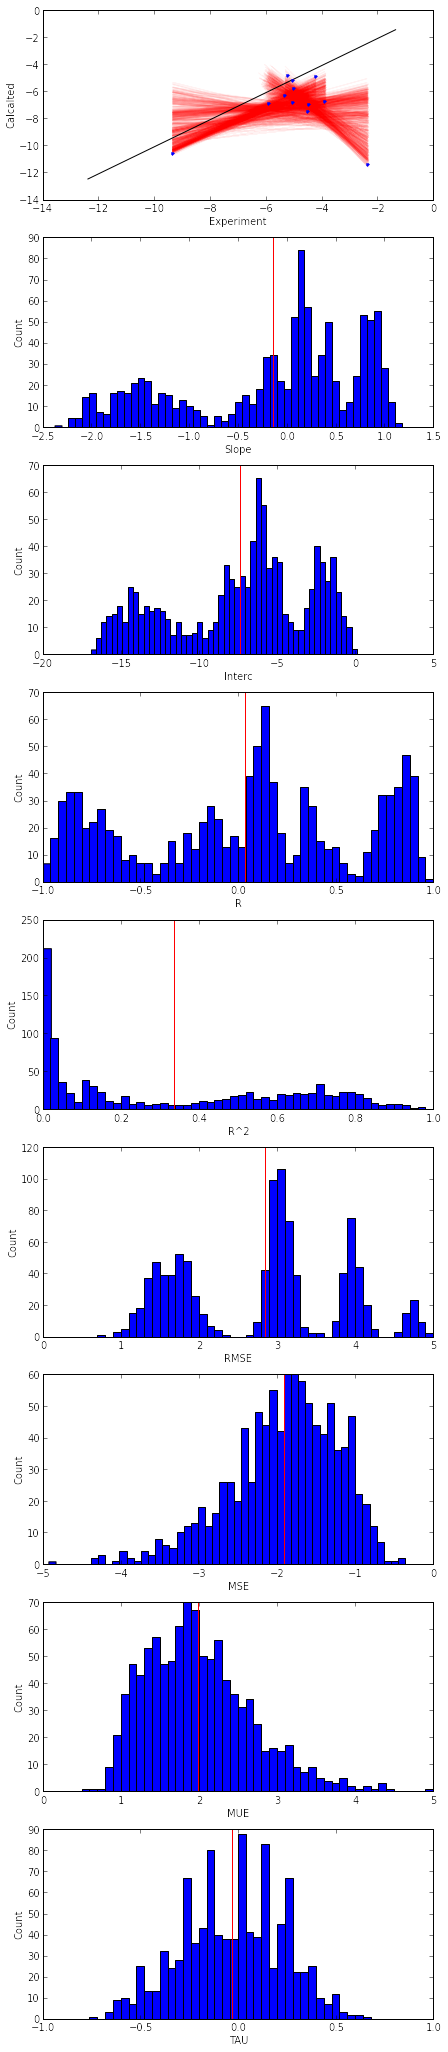

In [3]:
x=[-5.04397188061,-4.24909345614,-5.06283335446,-9.36979858682,-4.5001149933,-5.33308772647,-5.23625248707,-5.03768621742,-5.93646919304,-2.38338171345,-3.903599935,-4.51543033573]
xsem=[0.00627490369933,0.0126884194228,0.00745433128846,0.00238786242866,0.00103814449189,0.00363309265345,0.0456495910301,0.0316947708489,0.122422091424,0.0211585230612,0.0190832126608,0.0202288728896]
y=[-5.14,-4.85,-6.76,-10.56,-6.92,-6.26,-4.8,-5.76,-6.85,-11.41,-6.71,-7.46]
ysem=[0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0]

dmin = np.amin(np.array([np.amin(x),np.amin(y)]))-1
dmax = np.amax(np.array([np.amax(x),np.amax(y)]))+1
plt.figure(figsize=(7,4))
plt.axis([dmin, dmax, dmin, dmax])
plt.xlabel('Experiment')
plt.ylabel('Calcalted')
plt.plot([dmin, dmax], [dmin, dmax], 'k-');
#plt.plot(x, y, 'b.');
plt.errorbar(x,y,xerr=xsem,yerr=ysem, fmt='b.')

SType=3
print "These are the error metric distributions for: MovTyp-1\n\n"
MetricVals[SType],MetricErrs[SType] = bootstrap(x,y,xsem,ysem,WithRep=True)

These are the error metric distributions for: APR-TIP3P




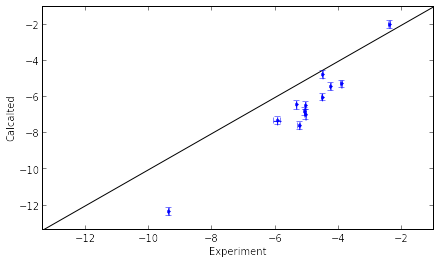

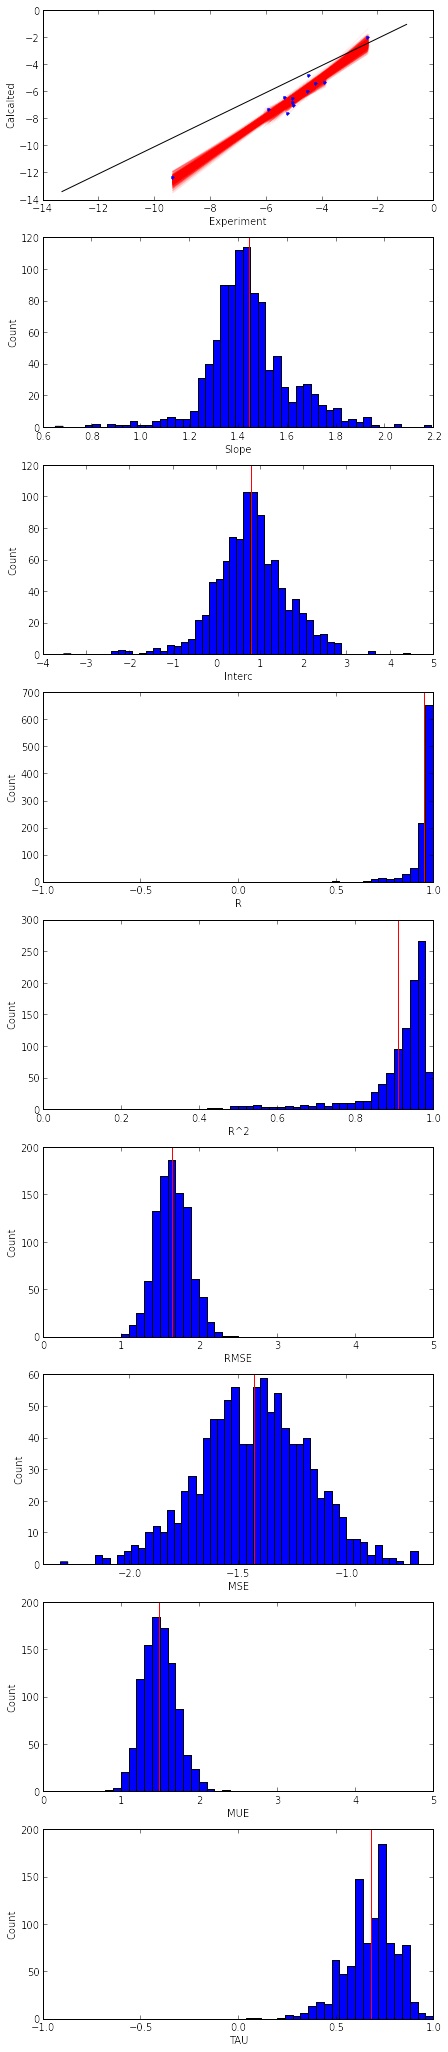

In [4]:
x=[-5.04397188061,-4.24909345614,-5.06283335446,-9.36979858682,-4.5001149933,-5.33308772647,-5.23625248707,-5.03768621742,-5.93646919304,-2.38338171345,-3.903599935,-4.51543033573]
xsem=[0.00627490369933,0.0126884194228,0.00745433128846,0.00238786242866,0.00103814449189,0.00363309265345,0.0456495910301,0.0316947708489,0.122422091424,0.0211585230612,0.0190832126608,0.0202288728896]
y=[-6.5,-5.42,-6.82,-12.34,-4.77,-6.46,-7.61,-6.99,-7.34,-1.99,-5.3,-6.02]
ysem=[0.23,0.22,0.23,0.23,0.24,0.23,0.21,0.3,0.22,0.23,0.22,0.21]

dmin = np.amin(np.array([np.amin(x),np.amin(y)]))-1
dmax = np.amax(np.array([np.amax(x),np.amax(y)]))+1
plt.figure(figsize=(7, 4))
plt.axis([dmin, dmax, dmin, dmax])
plt.xlabel('Experiment')
plt.ylabel('Calcalted')
plt.plot([dmin, dmax], [dmin, dmax], 'k-');
#plt.plot(x, y, 'b.');
plt.errorbar(x,y,xerr=xsem,yerr=ysem, fmt='b.')

SType=3
print "These are the error metric distributions for: APR-TIP3P\n\n"
MetricVals[SType],MetricErrs[SType] = bootstrap(x,y,xsem,ysem,WithRep=True)
